PART A



Confusion Matrix:
 Predicted     1     2     3
True                       
1          3000     0     0
2             1  2999     0
3             2     0  3998


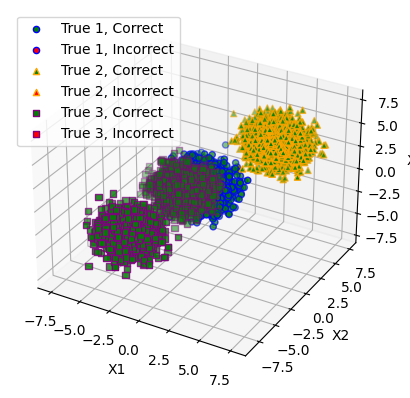

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the Gaussian distributions
np.random.seed(0)  # For reproducibility

# Means for the Gaussians
mu1 = np.array([0, 0, 0])
mu2 = np.array([4, 4, 4])
mu31 = np.array([-4, -4, -4])
mu32 = np.array([-4, 4, -4])

# Covariances for the Gaussians
sigma1 = np.eye(3)
sigma2 = np.eye(3)
sigma31 = np.eye(3)
sigma32 = np.eye(3)

# Priors for the classes
priors = [0.3, 0.3, 0.4]

# Number of samples to generate
num_samples = 10000

# Generate samples for each class
samples_class1 = np.random.multivariate_normal(mu1, sigma1, int(priors[0] * num_samples))
samples_class2 = np.random.multivariate_normal(mu2, sigma2, int(priors[1] * num_samples))
samples_class31 = np.random.multivariate_normal(mu31, sigma31, int(priors[2] * num_samples / 2))
samples_class32 = np.random.multivariate_normal(mu32, sigma32, int(priors[2] * num_samples / 2))

# Combine the samples and labels
samples_class3 = np.vstack((samples_class31, samples_class32))
samples = np.vstack((samples_class1, samples_class2, samples_class3))
labels = np.array([1] * len(samples_class1) + [2] * len(samples_class2) + [3] * len(samples_class3))

# Shuffle the data
indices = np.arange(samples.shape[0])
np.random.shuffle(indices)
samples = samples[indices]
labels = labels[indices]

# Function to calculate posterior probabilities
def posterior_probabilities(sample, priors, means, covariances):
    likelihoods = np.array([multivariate_normal.pdf(sample, mean=means[j], cov=covariances[j]) for j in range(len(priors))])
    posteriors = likelihoods * priors
    return posteriors / np.sum(posteriors)

# Means and covariances for each class
means = [mu1, mu2, mu31, mu32]
covariances = [sigma1, sigma2, sigma31, sigma32]

# Adjusting priors for class 3 as it is a mixture of two Gaussians
priors_adj = [priors[0], priors[1], priors[2] / 2, priors[2] / 2]

# Classify samples
classified_labels = []
for sample in samples:
    posteriors = posterior_probabilities(sample, priors_adj, means, covariances)
    # Combining posterior probabilities for class 3 components
    posteriors_class3 = posteriors[2] + posteriors[3]
    posteriors_combined = [posteriors[0], posteriors[1], posteriors_class3]
    classified_labels.append(np.argmax(posteriors_combined) + 1)

classified_labels = np.array(classified_labels)

# Create confusion matrix
confusion_matrix = pd.crosstab(pd.Series(labels, name='True'), pd.Series(classified_labels, name='Predicted'))
print("Confusion Matrix:\n", confusion_matrix)

# Marker shapes and colors for different true labels
marker_shapes = {1: 'o', 2: '^', 3: 's'}
class_colors = {1: 'blue', 2: 'orange', 3: 'purple'}

# Colors for correct (green) and incorrect (red) classifications
correct_colors = {True: 'green', False: 'red'}

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for true_label in np.unique(labels):
    for correct in [True, False]:
        idx = (labels == true_label) & (labels == classified_labels) if correct else (labels == true_label) & (labels != classified_labels)
        ax.scatter(samples[idx, 0], samples[idx, 1], samples[idx, 2], c=correct_colors[correct], marker=marker_shapes[true_label], edgecolor=class_colors[true_label], label=f'True {true_label}, {"Correct" if correct else "Incorrect"}')

# Adding legend and labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend()

plt.show()


PART B


Confusion Matrix for Lambda_10:
 Predicted     1     2     3
True                       
1          2994     0     6
2             1  2999     0
3             0     0  4000
Confusion Matrix for Lambda_100:
 Predicted     1     2     3
True                       
1          2987     0    13
2             1  2999     0
3             0     0  4000


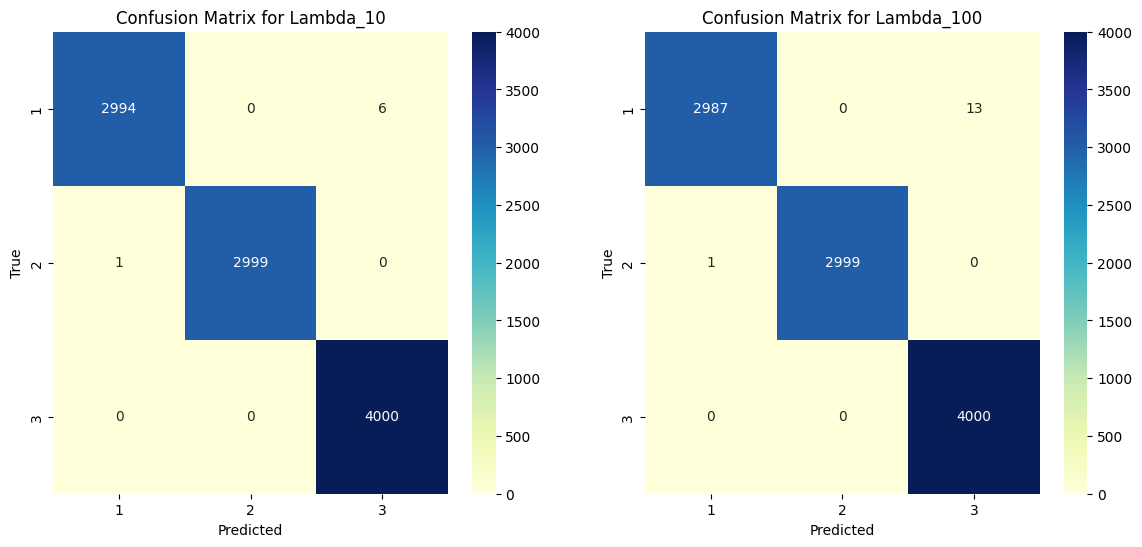

Minimum Expected Risk for Lambda_10: 0.0061
Minimum Expected Risk for Lambda_100: 0.1301


In [6]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Parameters for the Gaussian distributions
np.random.seed(0)  # For reproducibility

# Means for the Gaussians
mu1 = np.array([0, 0, 0])
mu2 = np.array([4, 4, 4])
mu31 = np.array([-4, -4, -4])
mu32 = np.array([-4, 4, -4])

# Covariances for the Gaussians
sigma1 = np.eye(3)
sigma2 = np.eye(3)
sigma31 = np.eye(3)
sigma32 = np.eye(3)

# Priors for the classes
priors = [0.3, 0.3, 0.4]

# Number of samples to generate
num_samples = 10000

# Generate samples for each class
samples_class1 = np.random.multivariate_normal(mu1, sigma1, int(priors[0] * num_samples))
samples_class2 = np.random.multivariate_normal(mu2, sigma2, int(priors[1] * num_samples))
samples_class31 = np.random.multivariate_normal(mu31, sigma31, int(priors[2] * num_samples / 2))
samples_class32 = np.random.multivariate_normal(mu32, sigma32, int(priors[2] * num_samples / 2))

# Combine the samples and labels
samples_class3 = np.vstack((samples_class31, samples_class32))
samples = np.vstack((samples_class1, samples_class2, samples_class3))
labels = np.array([1] * len(samples_class1) + [2] * len(samples_class2) + [3] * len(samples_class3))

# Shuffle the data
indices = np.arange(samples.shape[0])
np.random.shuffle(indices)
samples = samples[indices]
labels = labels[indices]

# Function to calculate posterior probabilities
def posterior_probabilities(sample, priors, means, covariances):
    likelihoods = np.array([multivariate_normal.pdf(sample, mean=means[j], cov=covariances[j]) for j in range(len(priors))])
    posteriors = likelihoods * priors
    return posteriors / np.sum(posteriors)

# Means and covariances for each class
means = [mu1, mu2, mu31, mu32]
covariances = [sigma1, sigma2, sigma31, sigma32]

# Adjusting priors for class 3 as it is a mixture of two Gaussians
priors_adj = [priors[0], priors[1], priors[2] / 2, priors[2] / 2]

# Function to classify samples using ERM with given loss matrix
def classify_samples_erm(samples, priors, means, covariances, loss_matrix):
    classified_labels = []
    for sample in samples:
        posteriors = posterior_probabilities(sample, priors, means, covariances)
        # Combine posteriors for class 3 components
        posteriors_combined = [posteriors[0], posteriors[1], posteriors[2] + posteriors[3]]
        expected_losses = np.dot(loss_matrix, posteriors_combined)
        classified_labels.append(np.argmin(expected_losses) + 1)
    return np.array(classified_labels)

# Define loss matrices
Lambda_10 = np.array([[0, 1, 10], [1, 0, 10], [1, 1, 0]])
Lambda_100 = np.array([[0, 1, 100], [1, 0, 100], [1, 1, 0]])

# Classify samples using both loss matrices
classified_labels_10 = classify_samples_erm(samples, priors_adj, means, covariances, Lambda_10)
classified_labels_100 = classify_samples_erm(samples, priors_adj, means, covariances, Lambda_100)

# Create confusion matrices
confusion_matrix_10 = pd.crosstab(pd.Series(labels, name='True'), pd.Series(classified_labels_10, name='Predicted'))
confusion_matrix_100 = pd.crosstab(pd.Series(labels, name='True'), pd.Series(classified_labels_100, name='Predicted'))

print("Confusion Matrix for Lambda_10:\n", confusion_matrix_10)
print("Confusion Matrix for Lambda_100:\n", confusion_matrix_100)

# Plot the confusion matrices
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_10, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix for Lambda_10")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix_100, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix for Lambda_100")

plt.show()

# Calculate the minimum expected risk for each loss matrix
def calculate_expected_risk(confusion_matrix, loss_matrix):
    total_samples = np.sum(confusion_matrix.values)
    risk = 0
    for i in range(3):
        for j in range(3):
            risk += confusion_matrix.iloc[i, j] * loss_matrix[i, j]
    return risk / total_samples

expected_risk_10 = calculate_expected_risk(confusion_matrix_10, Lambda_10)
expected_risk_100 = calculate_expected_risk(confusion_matrix_100, Lambda_100)

print(f"Minimum Expected Risk for Lambda_10: {expected_risk_10}")
print(f"Minimum Expected Risk for Lambda_100: {expected_risk_100}")
